In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
filepath = r"E:\UF MSADS\SEM 1\Programming for DS\Mini project\Mini project 3"
df = pd.read_csv('cleaned_data.csv')
df

,Unnamed: 0,y,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,age
0,0,1,54359,0,50,5,5,5,4,3,...,3,4,3,21,1,1,1,192,2,3
1,1,1,84649,0,44,1,1,1,1,3,...,4,4,2,0,0,1,1,1034,0,3
2,2,0,59015,0,72,3,1,5,5,3,...,1,3,2,0,0,1,3,1452,0,4
3,3,0,99990,0,38,1,3,1,3,5,...,1,4,5,0,0,0,3,916,0,2
4,4,1,83569,1,37,5,5,5,5,2,...,4,4,5,0,0,1,1,390,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103081,104717,1,30483,1,27,5,5,5,5,5,...,3,5,5,70,0,1,1,1371,0,1
103082,104718,0,23530,0,62,1,4,4,4,4,...,3,1,3,6,0,1,2,1703,10,4
103083,104719,0,88477,1,45,3,4,3,5,1,...,3,4,1,16,0,0,3,562,2,3
103084,104720,0,17164,1,57,2,4,2,2,4,...,2,3,4,0,0,0,2,315,0,4


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,age
0,1,54359,0,50,5,5,5,4,3,5,...,3,4,3,21,1,1,1,192,2,3
1,1,84649,0,44,1,1,1,1,3,3,...,4,4,2,0,0,1,1,1034,0,3
2,0,59015,0,72,3,1,5,5,3,2,...,1,3,2,0,0,1,3,1452,0,4
3,0,99990,0,38,1,3,1,3,5,1,...,1,4,5,0,0,0,3,916,0,2
4,1,83569,1,37,5,5,5,5,2,5,...,4,4,5,0,0,1,1,390,0,2


In [4]:
df.shape

(103086, 25)

**MODEL TRAIN-VALIDATION-TEST**

In [5]:
# Define independent and dependent variables
x = df.drop(columns=['y'])  
y = df['y']
print(x.shape, y.shape)

# Split data into train-validation-test sets 
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

(103086, 24) (103086,)
(72160, 24) (72160,)
(15463, 24) (15463,)
(15463, 24) (15463,)


In [6]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Accuracy: 0.872
Precision: 0.872
Recall: 0.872
F1 Score: 0.872


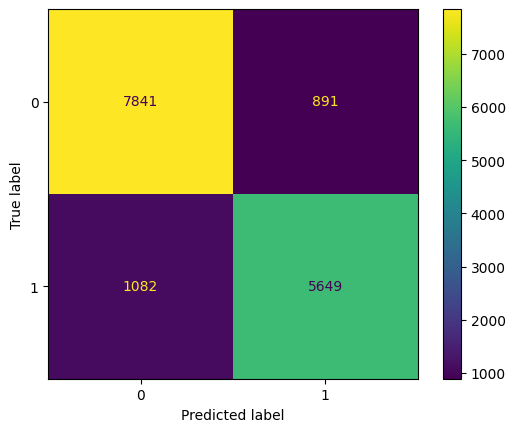

In [7]:
# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, lr_model.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, lr_model.predict(X_test),average='weighted')
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, lr_model.predict(X_test),average='weighted')
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, lr_model.predict(X_test),average='weighted')
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, lr_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

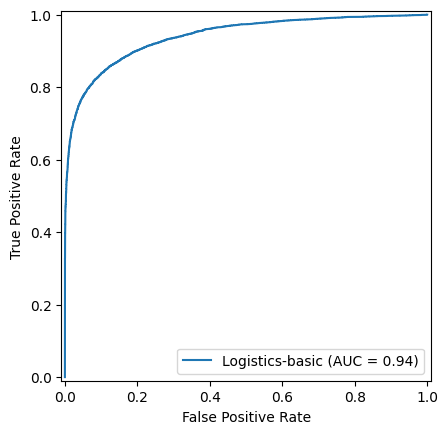

In [8]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,lr_model.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

**HYPERPARAMETER TUNING** ( Comparing Gridsearchcv and Randomizedsearchcv)

In [9]:
# Hyperparameter tuning using RandomizedSearchCV
param_grid_lg = {'solver': ['saga', 'liblinear'],
                 'penalty': ['l1', 'l2'],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'max_iter': [10000, 20000, 30000]}

**GRIDSEARCHCV**

In [10]:
# Initialize GridSearchCV
lg_grid = GridSearchCV(estimator=LogisticRegression(),  # the model
                        param_grid=param_grid_lg,  # hyperparameter space
                        scoring='roc_auc')

# Fit the model to the data
lg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [10000, 20000, 30000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             scoring='roc_auc')

In [11]:
# Best model after hyperparameter tuning
best_lg = lg_grid.best_estimator_
print(f"Best Parameters: {lg_grid.best_params_}")

Best Parameters: {'C': 10, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


In [12]:
# Predictions and probabilities
y_test_pred = best_lg.predict(X_test)
y_test_pred_proba = best_lg.predict_proba(X_test)[:, 1]

Accuracy: 0.872
Precision: 0.863
Recall: 0.839
F1 Score: 0.851


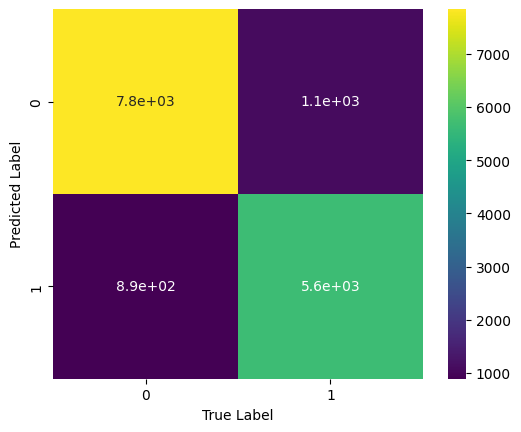

In [13]:
# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_test_pred)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_test_pred)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_test_pred)
print("F1 Score: %.3f" % f1)

# Confusion matrix visualization
cm = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm.T, annot=True, cmap='viridis', square=True, cbar=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

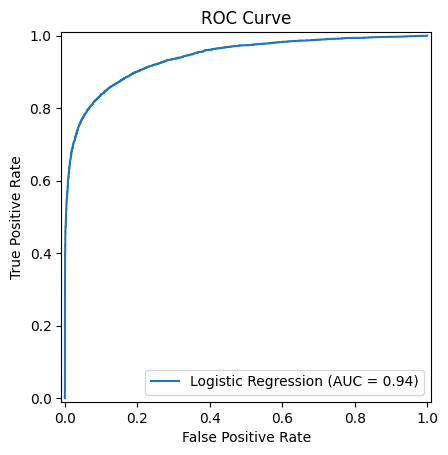

In [14]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic Regression')
display.plot()
plt.title('ROC Curve')
plt.show()

**RANDOMIZEDSEARCHCV**

In [15]:
# Initialize RandomizedSearchCV 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(lr_model, param_grid_lg, scoring='roc_auc', cv=cv, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'max_iter': [10000, 20000, 30000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   random_state=42, scoring='roc_auc')

In [16]:
# Best model after hyperparameter tuning
best_lg = lg_grid.best_estimator_
print(f"Best Parameters: {lg_grid.best_params_}")

Best Parameters: {'C': 10, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


In [17]:
# Predictions and probabilities
y_test_pred = best_lg.predict(X_test)
y_test_pred_proba = best_lg.predict_proba(X_test)[:, 1]

Accuracy: 0.872
Precision: 0.863
Recall: 0.839
F1 Score: 0.851


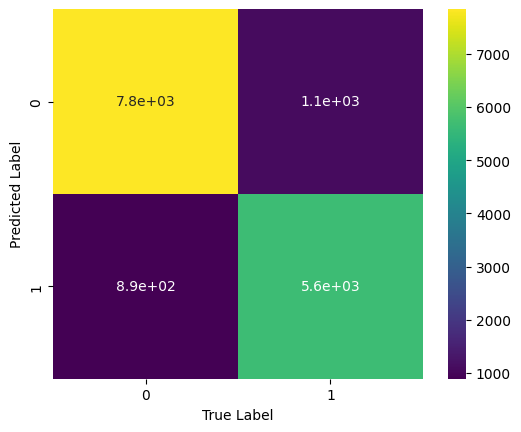

In [18]:
# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_test_pred)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_test_pred)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_test_pred)
print("F1 Score: %.3f" % f1)

# Confusion matrix visualization
cm = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm.T, annot=True, cmap='viridis', square=True, cbar=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

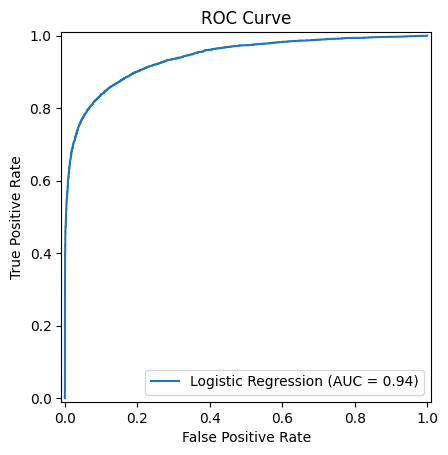

In [19]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic Regression')
display.plot()
plt.title('ROC Curve')
plt.show()

**MODEL EVALUATION ON VALIDATION SET**

Validation Accuracy: 0.874
Validation Precision: 0.867
Validation Recall: 0.840
Validation F1 Score: 0.853


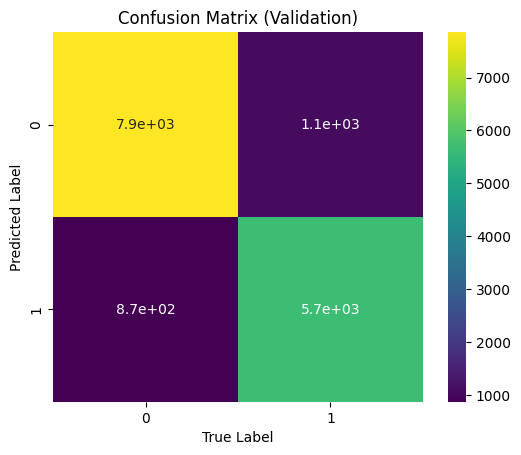

In [20]:
# Predictions and probabilities for validation data
y_val_pred = best_lg.predict(X_val)
y_val_pred_proba = best_lg.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics
val_accuracy = metrics.accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.3f}")

val_precision = metrics.precision_score(y_val, y_val_pred)
print(f"Validation Precision: {val_precision:.3f}")

val_recall = metrics.recall_score(y_val, y_val_pred)
print(f"Validation Recall: {val_recall:.3f}")

val_f1 = metrics.f1_score(y_val, y_val_pred)
print(f"Validation F1 Score: {val_f1:.3f}")

# Confusion matrix visualization
cm_val = metrics.confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val.T, annot=True, cmap='viridis', square=True, cbar=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix (Validation)')
plt.show()

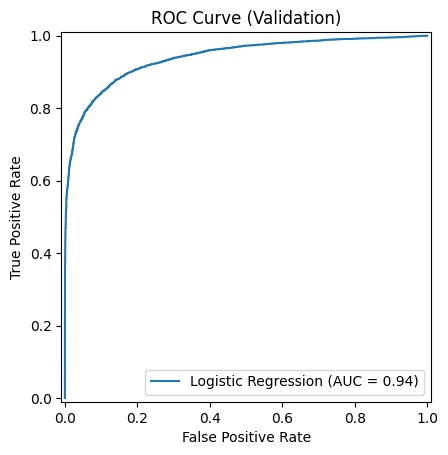

In [21]:
# Plot ROC/AUC curve
fpr_val, tpr_val, _ = metrics.roc_curve(y_val, y_val_pred_proba)
roc_auc_val = metrics.auc(fpr_val, tpr_val)
display_val = metrics.RocCurveDisplay(fpr=fpr_val, tpr=tpr_val, roc_auc=roc_auc_val, 
                                      estimator_name='Logistic Regression')
display_val.plot()
plt.title('ROC Curve (Validation)')
plt.show()

**FEATURE IMPORTANCE**

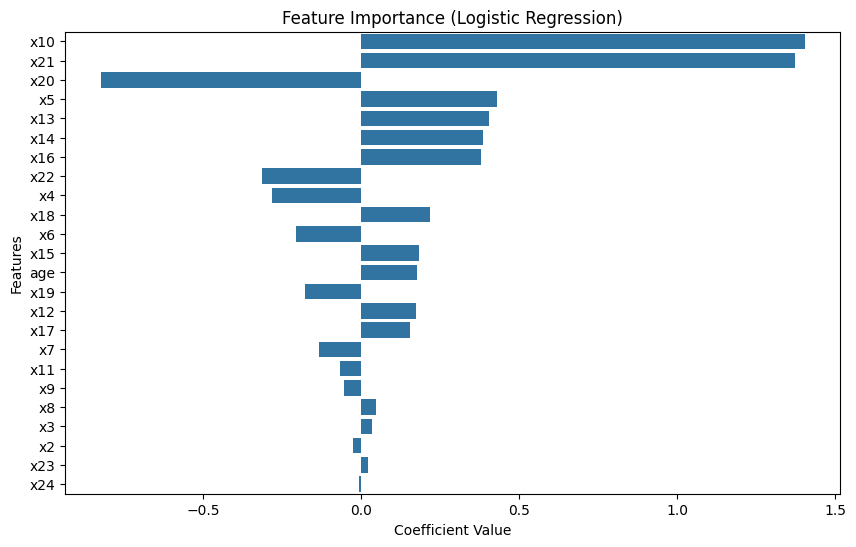

Top 5 important features:


,Feature,Importance
8,x10,1.404287
19,x21,1.373205
18,x20,-0.823618
3,x5,0.429415
11,x13,0.404587


In [22]:
# Retrieve feature coefficients
feature_importance = best_lg.coef_[0]

# Get feature names from the original DataFrame
feature_names = df.drop(columns=['y']).columns  

# Map coefficients to feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# Identify and print top features
print("Top 5 important features:")
importance_df.head()